In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset
sales_data = pd.read_csv('/content/sales_data.csv')

In [3]:
# Convert 'date' to datetime (specifying the format)
sales_data['date'] = pd.to_datetime(sales_data['date'], format='%d-%m-%Y')

# Extract features
sales_data['day_of_week'] = sales_data['date'].dt.dayofweek
sales_data['day'] = sales_data['date'].dt.day
sales_data['month'] = sales_data['date'].dt.month
sales_data['year'] = sales_data['date'].dt.year
sales_data['season'] = np.where(sales_data['month'].isin([12, 1, 2]), 0,
                                 np.where(sales_data['month'].isin([3, 4, 5]), 1,
                                          np.where(sales_data['month'].isin([6, 7, 8]), 2, 3)))

# Drop the original 'date' column
sales_data.drop(columns=['date'], inplace=True)

In [4]:
sales_data

,sales,holiday,past_sales,previous_year_sales,season,day_of_week,day,month,year
0,92.72,1,86.44,79.16,0,4,1,1,2021
1,90.70,0,92.72,87.13,0,5,2,1,2021
2,91.66,0,90.70,96.00,0,6,3,1,2021
3,83.07,0,91.66,78.55,0,0,4,1,2021
4,91.17,0,83.07,78.67,0,1,5,1,2021
...,...,...,...,...,...,...,...,...,...
1456,127.90,0,130.84,123.95,0,4,27,12,2024
1457,123.73,0,127.90,133.12,0,5,28,12,2024
1458,132.00,0,123.73,127.04,0,6,29,12,2024
1459,145.00,0,132.00,117.63,0,0,30,12,2024


from matplotlib import pyplot as plt
sales_data['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_data['holiday'].plot(kind='hist', bins=20, title='holiday')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_data['past_sales'].plot(kind='hist', bins=20, title='past_sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_data['previous_year_sales'].plot(kind='hist', bins=20, title='previous_year_sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_data.plot(kind='scatter', x='sales', y='holiday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_data.plot(kind='scatter', x='holiday', y='past_sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_data.plot(kind='scatter', x='past_sales', y='previous_year_sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
sales_data.plot(kind='scatter', x='previous_year_sales', y='season', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sales_data.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['holiday']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sales_data.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('holiday')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['past_sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sales_data.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('past_sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['previous_year_sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sales_data.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('previous_year_sales')

from matplotlib import pyplot as plt
sales_data['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sales_data['holiday'].plot(kind='line', figsize=(8, 4), title='holiday')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sales_data['past_sales'].plot(kind='line', figsize=(8, 4), title='past_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
sales_data['previous_year_sales'].plot(kind='line', figsize=(8, 4), title='previous_year_sales')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
# Define the features and target variable
X = sales_data.drop(columns=['sales'])
y = sales_data['sales']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split the data based on year
train_mask = sales_data['year'] < 2024  # Training data (2021 to 2023)
X_train = X_scaled[train_mask]
y_train = y[train_mask]

X_test = X_scaled[~train_mask]  # Testing data (2024)
y_test = y[~train_mask]

In [7]:
# Build the Keras model using the Functional API
input_layer = layers.Input(shape=(X_train.shape[1],))
dense_1 = layers.Dense(64, activation='relu')(input_layer)
dense_2 = layers.Dense(32, activation='relu')(dense_1)
output_layer = layers.Dense(1)(dense_2)  # Output layer for regression

model = keras.Model(inputs=input_layer, outputs=output_layer)

In [8]:
# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5306.0874 - val_loss: 1359.8545
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 331.8484 - val_loss: 203.7939
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 156.9820 - val_loss: 195.0644
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 159.5423 - val_loss: 136.8900
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 161.6310 - val_loss: 147.1256
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 133.9680 - val_loss: 135.7535
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 155.5064 - val_loss: 195.2453
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 172.5470 - val_loss: 165.6231
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 142.7708 - val_loss: 148.9444
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 202.6473 - val_loss: 163.3484
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 153.5410 - val_loss: 129.6083
Epoch 12/100
28/2

In [9]:
# Predict on the test set
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


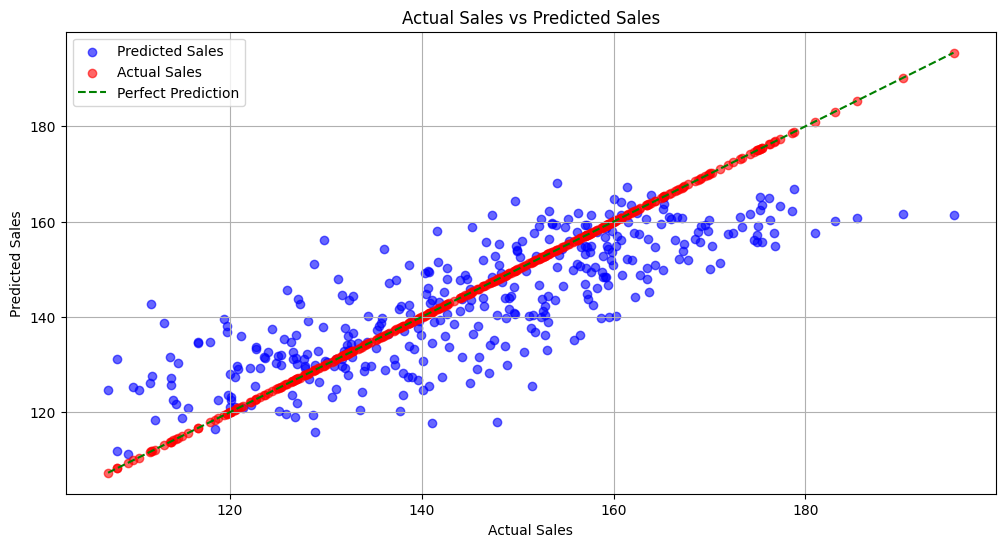

In [10]:
# Step 15: Plot the predictions vs actual sales
plt.figure(figsize=(12, 6))

# Scatter plot for actual sales
plt.scatter(y_test, y_pred, label='Predicted Sales', color='blue', alpha=0.6)

# Scatter plot for actual sales
plt.scatter(y_test, y_test, label='Actual Sales', color='red', alpha=0.6)

# Add a line where predicted sales equal actual sales
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'g--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 8.700027327407254
Mean Squared Error (MSE): 117.8136477874862
Root Mean Squared Error (RMSE): 10.854199546142784
R² Score: 0.6169824978178227
